# Filtragem de imagens e contornos com OpenCV

**Atenção**: Rode este notebook com `jupyter notebook` e não `jupyter lab`. A parte interativa requer que seja específico.

**Atenção**: Certifique-se de que tem o pacote `ipympl` instalado

Tópicos:
- [Filtragem linear](#filtragem)
- [Deteção de borda](#borda)
- [Detector de linhas de Canny](#canny)
- [Transformada de Hough](#hough)

Bibliografia: 

[Cap.5 - Computer Vision. Shapiro](https://courses.cs.washington.edu/courses/cse576/book/ch5.pdf)

[Cap.3 - Digital Image Processing. Gonzales / Woods](http://web.ipac.caltech.edu/staff/fmasci/home/astro_refs/Digital_Image_Processing_2ndEd.pdf)

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import sys
import math
print ("OpenCV Version : %s " % cv2.__version__)

from ipywidgets import widgets, interact, interactive, FloatSlider, IntSlider

import auxiliar as aux

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(aux) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(aux)



OpenCV Version : 4.5.0 


# Filtragem linear

Na filtragem linear, uma pequena matriz chamada de `kernel` é convoluída com a imagem. *Veja na lousa a explicação do professor*

In [2]:
img = cv2.imread("hall_box_battery1.jpg",cv2.IMREAD_GRAYSCALE )

In [3]:
small = cv2.resize(img, (768, 384), 0,0)

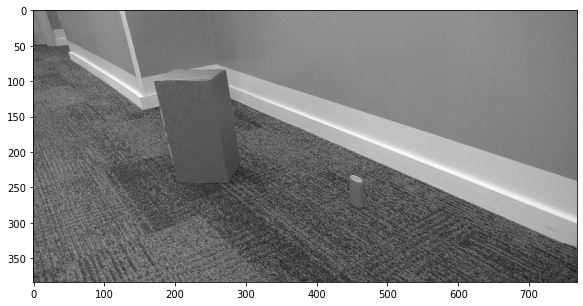

In [4]:
plt.figure(figsize=(10,5))
plt.imshow(small, cmap="gray", vmin=0, vmax=255)
plt.show()

In [5]:
def plot_filter(widgets, data):
    plt.figure(figsize=(10,5))
    kernel = aux.make_np_from_widgets_list(widgets)
    out3 = cv2.filter2D(data, -1,  kernel)
    plt.imshow(out3, cmap="gray", vmin=0, vmax=255)
    plt.show()
    

In [6]:
list_kernel, widgets_kernel = aux.make_widgets_mat(3,3)

In [41]:
widgets_kernel

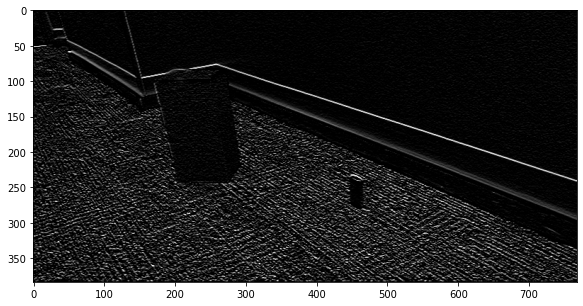

In [42]:
%matplotlib inline
plot_filter(list_kernel, small)

## Filtro de Blur (ou da média) 

In [9]:
from ipywidgets import interact, FloatSlider

In [10]:
def plot_blur(sz):
    plt.rcParams["figure.figsize"] = (8,5)
    blur = cv2.blur(small, (sz,sz))
    plt.imshow(blur, cmap="gray")
    plt.show()
    

In [36]:
%matplotlib widget
interact(plot_blur, sz=IntSlider(min=1, max=15, step=1, value=3))

interactive(children=(IntSlider(value=3, description='sz', max=15, min=1), Output()), _dom_classes=('widget-in…

<function __main__.plot_blur(sz)>

<div id="borda"></div>

Veja mais alguns kernels de processamento de imagem [no link](http://setosa.io/ev/image-kernels/)

# Realce de bordas

$$
\begin{pmatrix} -1 & -1 & -1 \\
-1 & 9 & -1 \\
-1 & -1 & -1 
\end{pmatrix}
$$

# Filtro de Sobel

$\frac{\partial I}{\partial x} \approx I * \begin{pmatrix} -1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1 
\end{pmatrix} \;\;\;\;\;\;\;$
$\frac{\partial I}{\partial x} \approx I * \begin{pmatrix} -1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1 
\end{pmatrix}$

$|\overrightarrow{\rm \nabla I}| = \sqrt{ \frac{\partial I}{\partial x}^2 + \frac{\partial I}{\partial x}^2} \;\;\;\;\;\;\;$
$\angle \nabla I = atan \left( \frac {\frac{\partial I}{\partial y}} {\frac{\partial I}{\partial x}}\right)$



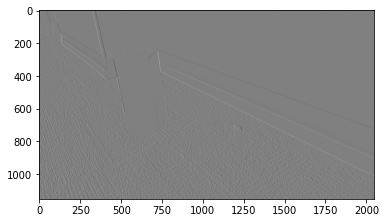

In [43]:
%matplotlib inline
Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0)
plt.imshow(Ix, cmap='gray')
plt.show()

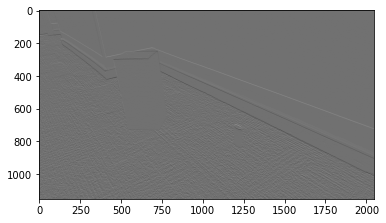

In [44]:
Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1)
plt.imshow(Iy, cmap='gray')
plt.show()

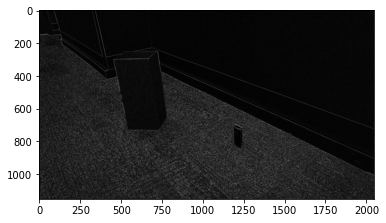

In [45]:
grad = (Ix**2 + Iy**2)**0.5
plt.imshow(grad, cmap='gray')
plt.show()

<div id="canny"></div>

# Detector de linhas de Canny

O detector de linhas de *Canny* combina algumas operações lineares de forma mais sofisticada.
Além disso, os contornos sofrem um processo de emagrecimento

In [46]:
min_contrast = 100
max_contrast = 200
linhas = cv2.Canny(small, min_contrast, max_contrast )

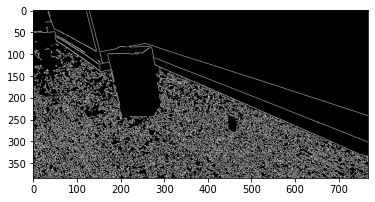

In [47]:
plt.imshow(linhas, cmap="gray")
plt.show()

In [48]:
# Função que calcula os parâmetros da função de Canny automaticamente
linhas = aux.auto_canny(small)

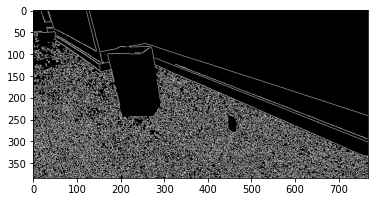

In [49]:
plt.imshow(linhas, cmap="gray")
plt.show()

In [50]:
def canny(minimo, maximo):
    img = cv2.Canny(small, minimo, maximo)
    plt.imshow(img, cmap="gray")
    plt.show()

In [52]:
w = interactive(canny, minimo=80, maximo=85)
w

interactive(children=(IntSlider(value=80, description='minimo', max=240, min=-80), IntSlider(value=85, descrip…

<div id="inrange"></div>